In [20]:
import torch
import torch.nn as nn
import string
from torchtext.data.utils import get_tokenizer

from gensim.corpora import WikiCorpus
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score


In [21]:
# from google.colab import drive
# drive.mount('/content/drive')

In [22]:
def make_token(splited_parts):
  sentence = []
  temp_word = ""
  for i in splited_parts:
    if i.islower() == False:
      if len(temp_word)>0 :
        sentence.append(temp_word)

      if len(i)>0 :  
        sentence.append(i)
        
      temp_word = ""
    else:
      temp_word = temp_word + i
  if len(temp_word)>0 :
    sentence.append(temp_word)  
  return sentence

In [23]:
string = []

f = open("../ta2.txt", "r")
myData = f.read()
myData = myData.lower()
myData = myData.replace("\n","");
myData = myData.split(".")
for i in range(len(myData)):
  x = myData[i].split()
  y = ' '.join(x)
  y = y.split(' ')

  temp_line = []
  for pw in y:
    tl = make_token(pw)
    for kl in tl:
      temp_line.append(kl)
  string.append(temp_line)

In [24]:
del string[-1]
print(string)
max_len = 0

for a in string:
  if len(a)>max_len:
    max_len = len(a)

max_len = max_len+1  

[['i', 'eat', 'rice'], ['the', 'cow', 'is', 'an', 'animal'], ['bangladesh', 'has', 'been', 'playing', 'cricket', 'since', '2', '0', '0', '0'], ['shakib', 'al', 'hasan', 'is', 'a', 'bangladeshi', 'international', 'cricketer'], ['mr'], ['x', 'has', 'joined', 'xyz', 'university', 'in', 'april', '2', '0', '1', '8', 'as', 'assistant', 'professor'], ['before', 'joining', 'in', 'xyz', 'universityhe', 'had', 'worked', 'at', 'abc', 'inc', ',', 'usa', 'as', 'senior', 'research', 'scientist'], ['now', ',', 'he', 'is', 'codirecting', 'the', 'zyx', 'lab', '@', 'xyz'], ['he', 'is', 'also', 'affiliated', 'with', 'data', '&', 'design', 'lab', 'as', 'research', 'associate'], ['i', 'drink', 'tea'], ['i', 'drink', 'coke', 'in', 'summer'], ['i', 'eat', 'rice', 'at', 'restaurent'], ['i', 'drink', 'milk', 'at', 'night'], ['i', 'sleep', 'a', 'lot'], ['deep', 'dark', 'night'], ['i', 'love', 'pets'], ['i', 'should', 'run']]


In [25]:
for i in string:
  count = max_len-len(i)
  print(count)
  for j in range(count):
    i.append('eol')

14
12
7
9
16
3
1
7
5
14
12
12
12
13
14
14
14


In [26]:
for i in string:
  print(i)
  print("Length => ",end=" ")
  print(len(i))
  print()

['i', 'eat', 'rice', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol']
Length =>  17

['the', 'cow', 'is', 'an', 'animal', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol']
Length =>  17

['bangladesh', 'has', 'been', 'playing', 'cricket', 'since', '2', '0', '0', '0', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol']
Length =>  17

['shakib', 'al', 'hasan', 'is', 'a', 'bangladeshi', 'international', 'cricketer', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol']
Length =>  17

['mr', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol', 'eol']
Length =>  17

['x', 'has', 'joined', 'xyz', 'university', 'in', 'april', '2', '0', '1', '8', 'as', 'assistant', 'professor', 'eol', 'eol', 'eol']
Length =>  17

['before', 'joining', 'in', 'xyz', 'universityhe', 'had', 'worked', 'at', 'abc', 'inc', ',', 'usa', 'as', 'senior', 'research', 'scientist', 'eo

In [27]:
my_all_string = []

for i in string:
  for j in i:
    my_all_string.append(j)

In [28]:
setString = set(my_all_string)

In [29]:
dictionary = {}
for i, item in enumerate(setString):
  dictionary[item] = i

In [30]:
len(dictionary)

77

In [31]:
class LSTM(nn.Module):
    def __init__(self,input_dim,hidden_dim):
        super(LSTM,self).__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        #LSTM takes, input_dim, hidden_dim and num_layers
        self.LSTM = nn.LSTM(input_dim,hidden_dim)
        self.LNN = nn.Linear(hidden_dim,input_dim)
        
    #Input must be 3 dimensional (seq_len, batch, input_dim). 
    #hc is a tuple of hidden and cell state vector. Each of them have shape (1,1,hidden_dim)
    def forward(self,inp,hc):
        #this gives outut for each input in the sequence and also (hidden and cell state vector)
        #Dimensions of output vector is (seq_len,batch,hidden_dim)
        output,_= self.LSTM(inp,hc)
        return self.LNN(output)

In [40]:
hidden_dim = max_len     
n_words = max_len
model = LSTM(len(dictionary),len(dictionary))
model = model.cuda()
optimizer = torch.optim.Adam(params = model.parameters(),lr=0.001)
LOSS = torch.nn.CrossEntropyLoss()

In [41]:
n_iters = 10000

train_costs = []

for epoch in range(n_iters):
  if (epoch+1)%1000==0:
    print(epoch+1)

  train_running_loss = 0

  for str_idx in range(len(string)):
    # make target
    targets = []
    for wrd_idx2 in string[str_idx]:
      targets.append(dictionary[wrd_idx2]) 

    targets = torch.tensor(targets)
    targets = targets.cuda()

    #Zero the previosus gradients
    model.zero_grad()
    optimizer.zero_grad()

    h = torch.rand(len(dictionary)).view(1,1,len(dictionary))
    c = torch.rand(len(dictionary)).view(1,1,len(dictionary))   

    h = h.cuda()
    c = c.cuda()
    
    # Making one hot encoding
    one_hot_labels = torch.zeros((len(string[0]), len(setString)))

    for ohl_idx in range(len(string[0])):
      if ohl_idx <= 0:
        one_hot_labels[ohl_idx, dictionary[string[str_idx][0]]] = 1
      else:
        one_hot_labels[ohl_idx, dictionary['eol']] = 1

    input = one_hot_labels.view(one_hot_labels.shape[0],1,one_hot_labels.shape[1])
    input = input.cuda()

    output = model(input,(h,c))
    output = output.view(max_len,len(dictionary))

    #Find loss
    loss = LOSS(output,targets)

    # Back Propagation
    loss.backward()

    # Optimize weight and bias
    optimizer.step()

    train_running_loss += loss.item()

  train_costs.append(train_running_loss/(len(string)*max_len))  

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


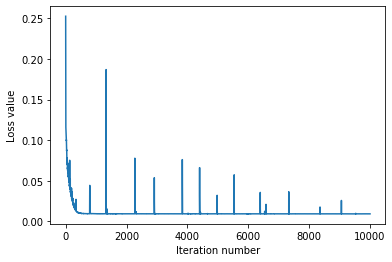

In [42]:
plt.plot(train_costs)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [43]:
def predict(my_input):
  model.zero_grad()
  optimizer.zero_grad()

  my_input = my_input.lower()
  my_input = my_input.split()
  n_myInput = len(my_input)
  count = max_len-len(my_input)

  for eol_idx in range(count):
    my_input.append('eol')

  predict_str = []
  for myInp_idx in my_input:
    predict_str.append(dictionary[myInp_idx])  

  one_hot_labels2 = torch.zeros((max_len, len(setString)))

  for idx in range(len(predict_str)):
    one_hot_labels2[idx, predict_str[idx]] = 1

  one_hot_labels2 = one_hot_labels2.view(one_hot_labels2.shape[0],1,one_hot_labels2.shape[1])

  one_hot_labels2 = one_hot_labels2.cuda()   

  h2 = torch.rand(len(dictionary)).view(1,1,len(dictionary))
  c2 = torch.rand(len(dictionary)).view(1,1,len(dictionary)) 

  h2 = h2.cuda()
  c2 = c2.cuda()
  output = model(one_hot_labels2,(h2,c2))

  output = output.view(max_len,len(dictionary))

  a = output.argmax(dim = 1)

  for ta in range(max_len):
    if ta>n_myInput-1:
      for i, item in enumerate(dictionary):
        if dictionary[item]==a[ta]:
          if item!='eol':
            print(item,end=' ')
            break

In [44]:
predict("I")

drink rice 

In [45]:
predict("I should")

rice 

In [54]:
predict("Shakib")

al hasan is a bangladeshi international cricketer 